In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [36]:
conhecimento_previo = ctrl.Antecedent(np.arange(0, 26, 1), 'conhecimento_previo')
dificuldade = ctrl.Antecedent(np.arange(0, 26, 1), 'dificuldade')
dificuldade_colar = ctrl.Antecedent(np.arange(0, 26, 1), 'dificuldade_colar')
estudar_horas = ctrl.Consequent(np.arange(0, 26, 1), 'estudar_horas')

conhecimento_previo.automf(3)
dificuldade.automf(3)
dificuldade_colar.automf(3)

conhecimento_previo['poor'] = fuzz.gaussmf(estudar_horas.universe, 3, 3)
conhecimento_previo['average'] = fuzz.gaussmf(estudar_horas.universe, 13, 3)
conhecimento_previo['good'] = fuzz.gaussmf(estudar_horas.universe, 19, 3)

dificuldade['poor'] = fuzz.trapmf(estudar_horas.universe, [0, 0, 4, 7])
dificuldade['average'] = fuzz.trapmf(estudar_horas.universe, [5, 7, 11, 15])
dificuldade['good'] = fuzz.trapmf(estudar_horas.universe, [10, 16, 21, 25])

dificuldade_colar['poor'] = fuzz.trimf(estudar_horas.universe, [0, 6, 9])
dificuldade_colar['average'] = fuzz.trimf(estudar_horas.universe, [8, 13, 18])
dificuldade_colar['good'] = fuzz.trimf(estudar_horas.universe, [17, 20, 25])

estudar_horas['durante a prova'] = fuzz.trapmf(estudar_horas.universe, [0, 0, 6, 12])
estudar_horas['cedo'] = fuzz.gaussmf(estudar_horas.universe, 12, 3)
estudar_horas['noite anterior'] = fuzz.trimf(estudar_horas.universe, [15, 20, 25])

C:\Users\lidiaxp\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


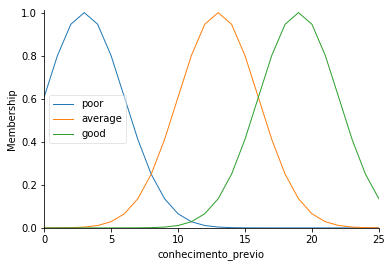

In [37]:
conhecimento_previo.view()

C:\Users\lidiaxp\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


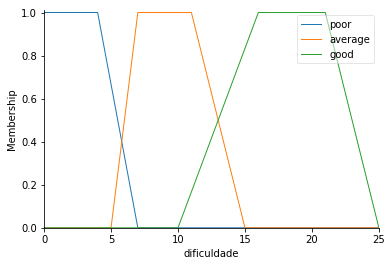

In [38]:
dificuldade.view()

C:\Users\lidiaxp\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


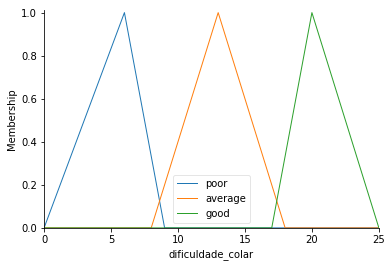

In [39]:
dificuldade_colar.view()

C:\Users\lidiaxp\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


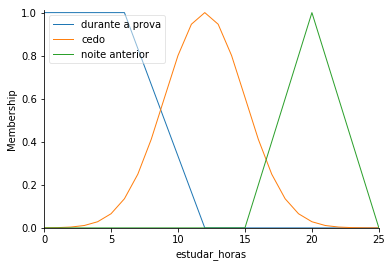

In [40]:
estudar_horas.view()

In [44]:
rule1 = ctrl.Rule(conhecimento_previo['good'] & dificuldade['poor'], estudar_horas['durante a prova'])
rule2 = ctrl.Rule(conhecimento_previo['good'] & dificuldade['average'], estudar_horas['noite anterior'])
rule3 = ctrl.Rule(conhecimento_previo['good'] & dificuldade['good'], estudar_horas['noite anterior'])
rule4 = ctrl.Rule(dificuldade['poor'] & dificuldade_colar['poor'], estudar_horas['durante a prova'])
rule5 = ctrl.Rule(dificuldade['average'] & dificuldade_colar['poor'], estudar_horas['durante a prova'])
rule6 = ctrl.Rule(dificuldade['poor'] & dificuldade_colar['poor'], estudar_horas['durante a prova'])
rule7 = ctrl.Rule(conhecimento_previo['poor'] & dificuldade['good'], estudar_horas['cedo'])
rule8 = ctrl.Rule(conhecimento_previo['average'] & dificuldade['good'], estudar_horas['cedo'])
rule9 = ctrl.Rule(dificuldade['poor'] & dificuldade['good'], estudar_horas['noite anterior'])
rule10 = ctrl.Rule(dificuldade['good'] & dificuldade_colar['average'], estudar_horas['cedo'])
rule11 = ctrl.Rule(dificuldade['average'] & dificuldade_colar['average'], estudar_horas['cedo'])
rule12 = ctrl.Rule(dificuldade['poor'] & dificuldade_colar['average'], estudar_horas['noite anterior'])
rule13 = ctrl.Rule(dificuldade['good'] & dificuldade['poor'], estudar_horas['noite anterior'])
rule14 = ctrl.Rule(dificuldade['average'] & dificuldade['poor'], estudar_horas['noite anterior'])

In [55]:
horas_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
horas = ctrl.ControlSystemSimulation(horas_ctrl)

12.006201243131816


C:\Users\lidiaxp\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


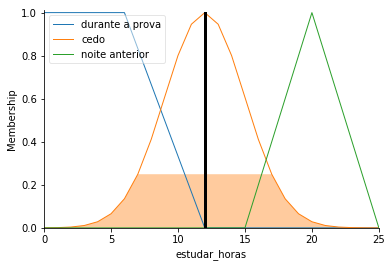

In [56]:
horas.input['conhecimento_previo'] = 8
horas.input['dificuldade'] = 16
horas.input['dificuldade_colar'] = 1

horas.compute()

print (horas.output['estudar_horas'])
estudar_horas.view(sim=horas)

12.409375104099894


C:\Users\lidiaxp\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


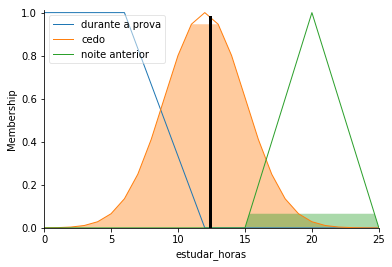

In [57]:
horas.input['conhecimento_previo'] = 12
horas.input['dificuldade'] = 18
horas.input['dificuldade_colar'] = 16

horas.compute()

print (horas.output['estudar_horas'])
estudar_horas.view(sim=horas)